<a href="https://colab.research.google.com/github/leolamoureux/Analyses_temperatures_mondiales/blob/main/R%C3%A9chauffement_climatique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import sklearn as sk
from sklearn.model_selection import train_test_split

In [69]:
df = pd.read_csv('/content/Data_Temperatures_.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [70]:
df['Year'].value_counts()

2000    119682
1999    119355
2001    119355
2002    119355
2003    119140
1998    119082
1996    118951
1997    118656
2004    118645
1995    118616
2005    117895
2006    117647
2010    115627
2007    115428
2008    114908
2009    114247
2011    113740
2012    111993
2013    111021
2014    109018
2015    107498
2016    107237
2017    106946
2018    106698
2019    106337
2020     38810
201        351
200         89
Name: Year, dtype: int64

on voit qu'il y a une année 200 et 201, on supprime celles ci car aberrantes.
On supprime aussi l'année 2020 car incomplète donc non significative


In [71]:
index = df[ df['Year'] == 200 ].index
index2 = df[ df['Year'] == 201 ].index
index3 = df[ df['Year'] == 2020 ].index

In [72]:
df.drop(index, inplace=True)
df.drop(index2, inplace=True)
df.drop(index3, inplace=True)

In [73]:
df['Year'].value_counts()#verification

2000    119682
1999    119355
2001    119355
2002    119355
2003    119140
1998    119082
1996    118951
1997    118656
2004    118645
1995    118616
2005    117895
2006    117647
2010    115627
2007    115428
2008    114908
2009    114247
2011    113740
2012    111993
2013    111021
2014    109018
2015    107498
2016    107237
2017    106946
2018    106698
2019    106337
Name: Year, dtype: int64

In [74]:
#convertir en degrés
df['AvgTemperature']= (df['AvgTemperature'] - 32) * 5/9

In [75]:
df['AvgTemperature'].head(10)

0    17.888889
1     9.666667
2     9.333333
3     8.000000
4     8.833333
5     9.277778
6     9.388889
7     9.500000
8     9.444444
9    11.055556
Name: AvgTemperature, dtype: float64

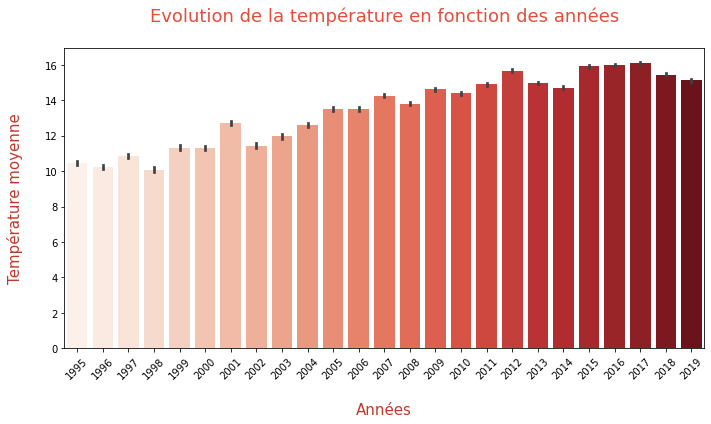

In [76]:
plt.figure(figsize=(10,6))
sbn.barplot(x=df['Year'], y=df['AvgTemperature'], palette="Reds")
sbn.set_style({'axes.facecolor': 'Grey'})
plt.xlabel('\nAnnées', fontsize=15, color='#c0392b')
plt.ylabel("Température moyenne\n", fontsize=15, color='#c0392b')
plt.title("Evolution de la température en fonction des années\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()

on voit une augmentation générale des températures

In [77]:
import plotly.express as pltexp

MoyT=df.groupby(['Region','Year'])['AvgTemperature'].mean().reset_index()

fig = pltexp.bar(MoyT, y = 'AvgTemperature', x = 'Region', 
                 color = 'Region', 
                 animation_frame = 'Year',
                 hover_name = 'AvgTemperature', range_y = [0, 30],
                 labels = {'AvgTemperature': 'Température moyenne en degrés', 'Region':'Continent', 'Year':'Année'},
                 title = 'Changements des températures moyennes par région en fonction des années')

fig.show()

Région la plus chaude en 1995 = south pacific/austalia 

Région les plus chaude en 2019 = Middle east + South/central america & carribean


Région les moins chaude en 1995 = South/central america & carribean + Europe

Région les moins chaude en 2019 = Europe 

In [78]:
df.drop(['State'],axis=1,inplace=True)

Text(0.5, 1.0, 'Augmentation des températures par Region')

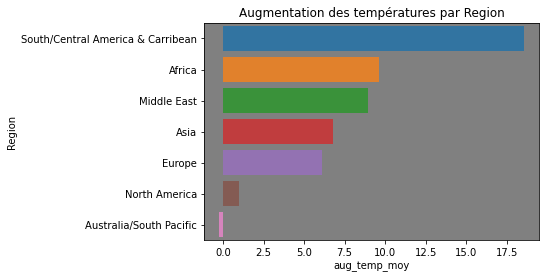

In [221]:
MoyTemps={}
Regions=df['Region'].unique()
for i in Regions:
    MoyTemps[i]=df[(df['Region']==i)&
                               (df['Year']==2019)]['AvgTemperature'].mean()-df[(df['Region']==i)&
                                                                               (df['Year']==1995)]['AvgTemperature'].mean()

aug_T=pd.DataFrame(list(MoyTemps.items()),columns=['Region','aug_temp_moy'])

sbn.barplot(x='aug_temp_moy',
            y='Region',
            data=aug_T.sort_values(by='aug_temp_moy',ascending=False)).set_title('Augmentation des températures par Region')

Le pacifique sud/australie et le nord de l'amérique ont la plus faible augmentation des températures.
il etaient dans les plus hautes températures moyennes en 1995 mais n'ont pas vraiment évolués contrairement aux autres régions, les placants dans les régions ayant les plus faibles températures en 2019.

L'amerique central et du sud ainsi que les caraibes ont connu une très forte croissance, en partant de région avec les températures les moins élevées en 1995 et terminant avec les températures les plus élevées en 2019.


L'europe a connu une augmentation de température moyenne lui permettant de garder les moyennes de températures les plus basses et ce depuis 1995

In [79]:
#température moyennes les plus extrêmes

#en 1995
max1=df['AvgTemperature'][(df['Year']==1995) &
             (df['AvgTemperature']==df['AvgTemperature'][df['Year']==1995].max())]

min1=df['AvgTemperature'][(df['Year']==1995) &
             (df['AvgTemperature']==df['AvgTemperature'][df['Year']==1995].min())]

#en 2019
max2=df['AvgTemperature'][(df['Year']==2019) &
             (df['AvgTemperature']==df['AvgTemperature'][df['Year']==2019].max())]

min2=df['AvgTemperature'][(df['Year']==2019) &
             (df['AvgTemperature']==df['AvgTemperature'][df['Year']==2019].min())]

print(f'max 1995 : {round(max1.unique().item())} °, min 1995 : {round(min1.unique().item())}°; max 2019 : {round(max2.unique().item())}°,min 2019 : {round(min2.unique().item())}°')

max 1995 : 42 °, min 1995 : -73°; max 2019 : 43°,min 2019 : -73°


In [80]:
#Ville ayant eu les records de température

#en 1995
h1=df['Region'][(df['Year']==1995) &
             (df['AvgTemperature']==df['AvgTemperature'][df['Year']==1995].max())]

b1=df['Region'][(df['Year']==1995) &
             (df['AvgTemperature']==df['AvgTemperature'][df['Year']==1995].min())]


#en 2019
h2=df['Region'][(df['Year']==2019) &
             (df['AvgTemperature']==df['AvgTemperature'][df['Year']==2019].max())]

b2=df['Region'][(df['Year']==2019) &
             (df['AvgTemperature']==df['AvgTemperature'][df['Year']==2019].min())]

print(f'Régions avec la température max en 1995 : {h1.unique()}')
print(f'Régions avec la température min en 1995 : {b1.unique()}')
print(f'Régions avec la température max en 2019 : {h2.unique()}')
print(f'Régions avec la température min en 2019 : {b2.unique()}')

Régions avec la température max en 1995 : ['Middle East']
Régions avec la température min en 1995 : ['Africa' 'Asia' 'Australia/South Pacific' 'Europe' 'Middle East'
 'North America' 'South/Central America & Carribean']
Régions avec la température max en 2019 : ['Middle East']
Régions avec la température min en 2019 : ['Africa' 'Asia' 'Australia/South Pacific' 'Europe' 'Middle East'
 'North America' 'South/Central America & Carribean']


### Taux de croissance des températures par année

taux de croissance = ((y2-y1)/y1)*100

In [164]:
Taux_aug_list={}

for r in MoyT['Region'].unique():
  for i in MoyT['Year'].unique():
    y1_list=MoyT['AvgTemperature'][(MoyT['Year']==i) & (MoyT['Region']==r)]
    y2_list=MoyT['AvgTemperature'][(MoyT['Year']==i+1) & (MoyT['Region']==r)]
    if y2_list.size !=0:
      aug = ((y2_list.unique().item() - y1_list.unique().item()) / y1_list.unique().item())*100
      Taux_aug_list[r,i]=round(aug)

In [201]:
print(f'Taux de croissance par année en %: {Taux_aug_list}')*

Taux de croissance par année en %: {('Africa', 1995): -22, ('Africa', 1996): -68, ('Africa', 1997): -132, ('Africa', 1998): -229, ('Africa', 1999): -181, ('Africa', 2000): -510, ('Africa', 2001): -72, ('Africa', 2002): 12, ('Africa', 2003): 297, ('Africa', 2004): 74, ('Africa', 2005): 1, ('Africa', 2006): 104, ('Africa', 2007): -9, ('Africa', 2008): 23, ('Africa', 2009): -23, ('Africa', 2010): 5, ('Africa', 2011): 27, ('Africa', 2012): 1, ('Africa', 2013): 0, ('Africa', 2014): 2, ('Africa', 2015): 4, ('Africa', 2016): 0, ('Africa', 2017): -6, ('Africa', 2018): 2, ('Asia', 1995): 47, ('Asia', 1996): -8, ('Asia', 1997): -16, ('Asia', 1998): 9, ('Asia', 1999): -6, ('Asia', 2000): 29, ('Asia', 2001): -3, ('Asia', 2002): 13, ('Asia', 2003): -3, ('Asia', 2004): -4, ('Asia', 2005): 6, ('Asia', 2006): -1, ('Asia', 2007): 5, ('Asia', 2008): 7, ('Asia', 2009): 3, ('Asia', 2010): 0, ('Asia', 2011): -1, ('Asia', 2012): 1, ('Asia', 2013): -1, ('Asia', 2014): 1, ('Asia', 2015): -2, ('Asia', 2016): 4

###analyse des températures selon les mois


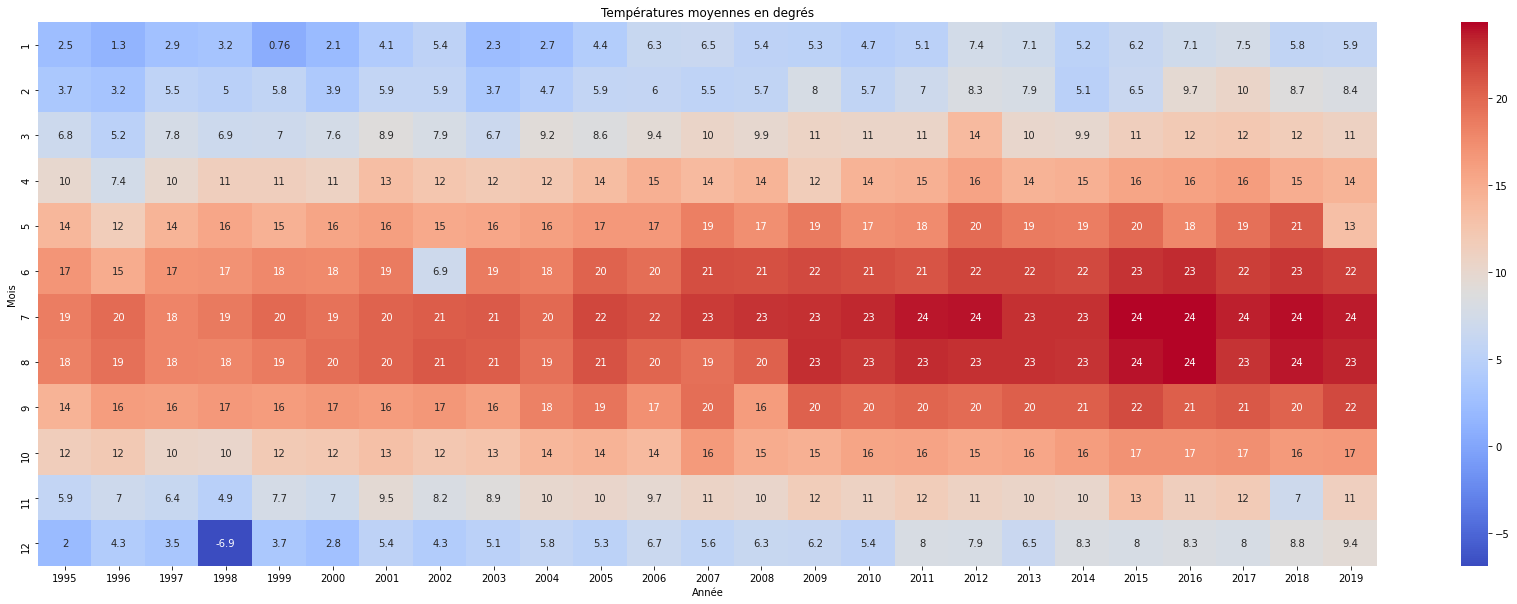

In [235]:
Mois_analyse = pd.pivot_table(data= df,index='Month',values='AvgTemperature',columns='Year')
plt.figure(figsize=(30, 10))
sbn.heatmap(data = Mois_analyse, cmap='coolwarm', annot = True)
plt.ylabel('Mois')
plt.xlabel('Année')
plt.title('Températures moyennes en degrés')
plt.show();

on voit que les températures ont augmenté de manière significative surtout les mois d'hiver